# Imports

In [1]:
from math import pi, sqrt, cos, sin, atan2, degrees, tan
from random import random, gauss
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Setting up the Environment

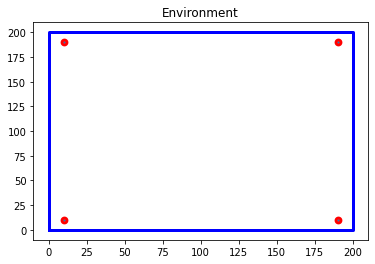

In [2]:
landmarks  = [[10, 10], [190, 190], [10, 190], [190, 10]]
world_size = 200
def drawEnv():
    x_landmark = [10, 190, 10, 190]
    y_landmark = [10, 190, 190, 10]
    # Draw point based on above x, y axis values.
    plt.scatter(x_landmark, y_landmark, s=8, edgecolors="red", linewidths=5)
    x_bounds = [0, 200, 200, 0, 0]
    # List to hold y values.
    y_bounds = [0, 0, 200, 200, 0]
    # Plot the environment bound
    plt.plot(x_bounds, y_bounds, linewidth=3, color='b')
    plt.title("Environment")
drawEnv()
plt.show()

# Initializing the Robot

In [3]:
MAX_STEERING_ANGLE = pi / 4 # r

def set_pos(new_x, new_y, new_orientation, new_steering):
    if new_x < 0 or new_x >= world_size:
        raise ValueError('X coordinate out of bound')
    if new_y < 0 or new_y >= world_size:
        raise ValueError('Y coordinate out of bound')
    if new_orientation < 0 or new_orientation >= 2 * pi:
        raise ValueError('Orientation must be in [0..2pi]')
    if new_steering < -MAX_STEERING_ANGLE or new_steering >= MAX_STEERING_ANGLE:
        raise ValueError('Steering must be in [-pi/4..pi/4]')
    return float(new_x), float(new_y), float(new_orientation), float(new_steering)

BEARING_NOISE_VAR, STEERING_NOISE_VAR, DISTANCE_NOISE_VAR = (0.1, 0.1, 5)

ROBOT_LENGTH = 10

robot = {
            "front_x": random() * world_size,
            "front_y": random() * world_size,
            "orientation": random() * 2 * pi,
            "steering": -MAX_STEERING_ANGLE + (MAX_STEERING_ANGLE*2)*random()
        }

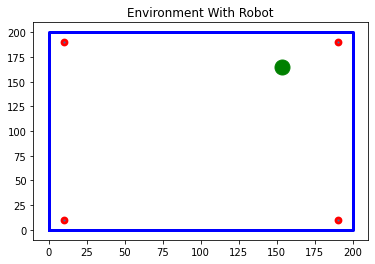

In [4]:
def drawEnvWithBoth():
    drawEnv()
    plt.title("Environment With Robot")
    plt.plot(robot['front_x'], robot['front_y'], marker='o', color='g', markersize=15)
drawEnvWithBoth()
plt.show()

# Sense Function

In [5]:
def getAngle(fromX,fromY,toX,toY):
    deltaX = fromX - toX
    deltaY = fromY - toY
    return atan2(deltaY, deltaX)

x2 = []
y2 = []

def sense(rob):
    Z = []
    for landmark in landmarks:
        z = getAngle(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        dist = sqrt(((rob['front_x'] - landmark[0])**2) + ((rob['front_y'] - landmark[1])**2))
        x2.append(rob['front_x'] + dist * -cos(z))
        y2.append(rob['front_y'] + dist * -sin(z))
        Z.append(z)

    return Z

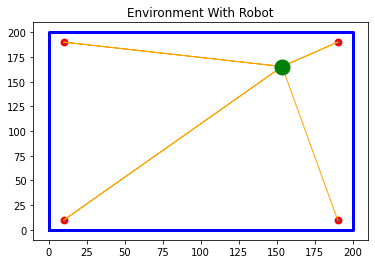

In [6]:
s = sense(robot)

def drawEnvWithSensorReadings():
    line_x = []
    for x in x2:
        line_x.append(robot['front_x'])
        line_x.append(x)

    line_y = []
    for y in y2:
        line_y.append(robot['front_y'])
        line_y.append(y)

    plt.plot(line_x, line_y, linewidth=1, color='orange')
    drawEnvWithBoth()
drawEnvWithSensorReadings()
plt.show()

In [7]:
plt.clf()
def sense(rob):
    Z = []
    for landmark in landmarks:
        z = getAngle(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        z += gauss(0, 0.1)
        dist = sqrt(((rob['front_x'] - landmark[0])**2) + ((rob['front_y'] - landmark[1])**2))
        x2.append(rob['front_x'] + dist * -cos(z))
        y2.append(rob['front_y'] + dist * -sin(z))
        Z.append(z)

    return Z

<Figure size 432x288 with 0 Axes>

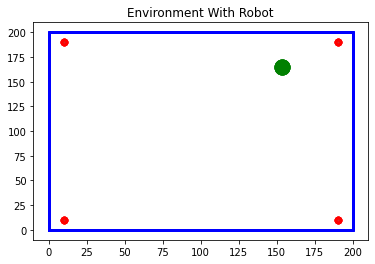

In [8]:
for _ in range(4):
    s = sense(robot)
    x2 = []
    y2 = []
    drawEnvWithSensorReadings()

plt.show()

# Move Function

In [9]:
def move(rob, steer_angle, distance):
    if steer_angle < -MAX_STEERING_ANGLE or steer_angle >= MAX_STEERING_ANGLE:
        raise ValueError('Robot can only move -pi/4 - pi/4')
    if distance < 0:
        raise ValueError('Robot can only move forward')

    # get steering angle
    steering = rob['steering'] + steer_angle + gauss(0, STEERING_NOISE_VAR)
    steering %= MAX_STEERING_ANGLE

    # get distance
    dist = distance + gauss(0.0, DISTANCE_NOISE_VAR)


    # get turn angle
    turn = (dist/ROBOT_LENGTH) * tan(steering)

    if turn >0.001:
        # Bycicle Model
        r = tan((pi/2) - steering) * ROBOT_LENGTH

        Cx = rob['front_x'] - (r * sin(rob['orientation']))
        Cy = rob['front_y'] + (r * cos(rob['orientation']))

        x = Cx + (r * sin(rob['orientation'] + turn))
        y = Cy - (r * cos(rob['orientation'] + turn))

        orientation = (rob['orientation'] + turn)
        orientation %= 2 * pi

    else:
        # Linear Model
        x = rob['front_x'] + (cos(rob['orientation']) * dist)
        y = rob['front_y'] + (sin(rob['orientation']) * dist)
        x %= world_size
        y %= world_size
        orientation = (rob['orientation'] + steering)
        orientation %= 2 * pi

    return set_pos(x, y, orientation, steering)

In [88]:
robot['front_x'], robot['front_y'], robot['orientation'], robot['steering'] = move(robot, -pi/8, 10)

drawEnvWithBoth()
plt.show()

ValueError: Y coordinate out of bound

# Particle Filter